In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import sklearn as sk
import pickle

train = pickle.load(open('train.p','rb'))
test = pickle.load(open('test.p','rb'))



In [8]:
tags = train[train['clean']==False]
tags = tags[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult','identity_hate']]
#tags['clean'] = tags['clean'].astype(int)

def TagCorr(tag1,tag2):
    tmp = tags[[tag1,tag2]]
    n11 = len(tmp[(tmp[tag1]==1) & (tmp[tag2]==1)])
    n10 = len(tmp[(tmp[tag1]==1) & (tmp[tag2]==0)])
    n01 = len(tmp[(tmp[tag1]==0) & (tmp[tag2]==1)])
    n00 = len(tmp[(tmp[tag1]==0) & (tmp[tag2]==0)])
    print(tag1,tag2,'--------------')
    print('n11',n11)
    print('n00',n00)
    print('n10',n10)
    print('n01',n01)
    print()
    
    

    n1all = n11+n10
    n0all = n00+n01
    nall1 = n11+n01
    nall0 = n00+n01

    phi = (n11*n00 - n01*n10)/(np.sqrt(nall0*nall1*n0all*n1all))
    return phi
from itertools import combinations
scores = {}
for item in combinations(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult','identity_hate'],2):
    col1=item[0]
    col2=item[1]
    #print(tags.pivot(index=[col1],columns=[col2]))
    #print(item, '-------- ')
    scores[(col1,col2)] = TagCorr(col1,col2)
# #print(scores)
import operator
x = scores
sorted_x = sorted(x.items(), key=operator.itemgetter(1))
for ii in sorted_x:
    print(ii)

toxic severe_toxic --------------
n11 965
n00 553
n10 8272
n01 0

toxic obscene --------------
n11 4797
n00 241
n10 4440
n01 312

toxic threat --------------
n11 289
n00 537
n10 8948
n01 16

toxic insult --------------
n11 4445
n00 233
n10 4792
n01 320

toxic identity_hate --------------
n11 751
n00 490
n10 8486
n01 63

severe_toxic obscene --------------
n11 921
n00 4637
n10 44
n01 4188

severe_toxic threat --------------
n11 75
n00 8595
n10 890
n01 230

severe_toxic insult --------------
n11 833
n00 4893
n10 132
n01 3932

severe_toxic identity_hate --------------
n11 178
n00 8189
n10 787
n01 636

obscene threat --------------
n11 198
n00 4574
n10 4911
n01 107

obscene insult --------------
n11 3739
n00 3655
n10 1370
n01 1026

obscene identity_hate --------------
n11 612
n00 4479
n10 4497
n01 202

threat insult --------------
n11 200
n00 4920
n10 105
n01 4565

threat identity_hate --------------
n11 64
n00 8735
n10 241
n01 750

insult identity_hate --------------
n11 675
n00 4886
n10 

In [2]:
print(train.columns)
for item in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult','identity_hate','clean']:
    print(item,train[train[item] == 1].shape)
# train['comment_text'] = train['comment_text'].str.lower()
# train['comment_text'] = train['comment_text'].str.replace('^\d+|\n|\t|"|==|;|:|@', '', case=False)
# train['comment_text'] = train['comment_text'].str.replace('\d+', '')
# train['comment_text'] = train['comment_text'].str.replace(',', '')
# train['comment_text'] = train['comment_text'].str.replace('?', '')
# train['comment_text'] = train['comment_text'].str.replace('!', '')
# train['comment_text'] = train['comment_text'].str.replace('&', '')
# train['comment_text'] = train['comment_text'].str.replace('[...]', '')
# train['comment_text'] = train['comment_text'].str.replace('[....]', '')

Index(['comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate', 'clean'],
      dtype='object')
toxic (9237, 8)
severe_toxic (965, 8)
obscene (5109, 8)
threat (305, 8)
insult (4765, 8)
identity_hate (814, 8)
clean (86061, 8)


In [2]:
clean = train.loc[np.random.choice(train[train['clean']==True].index.tolist(),size=9237)].reset_index(drop=True)
severe_toxic = train.loc[np.random.choice(train[train['severe_toxic']==True].index.tolist(),size=6000,replace=True)].reset_index(drop=True)
obscene = train.loc[np.random.choice(train[train['obscene']==True].index.tolist(),size=2000,replace=True)].reset_index(drop=True)
threat = train.loc[np.random.choice(train[train['threat']==True].index.tolist(),size=6000,replace=True)].reset_index(drop=True)
insult = train.loc[np.random.choice(train[train['insult']==True].index.tolist(),size=2300,replace=True)].reset_index(drop=True)
identity_hate = train.loc[np.random.choice(train[train['identity_hate']==True].index.tolist(),size=6000,replace=True)].reset_index(drop=True)
toxic = train[train['toxic']==1].reset_index(drop=True)

# clean = train.loc[np.random.choice(train[train['clean']==True].index.tolist(),size=300)].reset_index(drop=True)
# toxic = train.loc[np.random.choice(train[train['toxic']==True].index.tolist(),size=300,replace=False)].reset_index(drop=True)
# obscene = train.loc[np.random.choice(train[train['obscene']==True].index.tolist(),size=300,replace=False)].reset_index(drop=True)
# severe_toxic = train.loc[np.random.choice(train[train['severe_toxic']==True].index.tolist(),size=300,replace=True)].reset_index(drop=True)
# insult = train.loc[np.random.choice(train[train['insult']==True].index.tolist(),size=300,replace=False)].reset_index(drop=True)
# identity_hate = train.loc[np.random.choice(train[train['identity_hate']==True].index.tolist(),size=300,replace=True)].reset_index(drop=True)
# threat = train[train['threat']==1].reset_index(drop=True)

In [3]:
sampled_train = pd.concat([clean,threat,toxic,insult,identity_hate,obscene,severe_toxic]).reset_index(drop=True)
#sampled_train = sampled_train.sample(frac=1).reset_index(drop=True)
sampled_train['clean'] = sampled_train['clean'].astype(int)
print(sampled_train.shape)


(40774, 8)


In [5]:
# from sklearn.decomposition import SparsePCA
# from sklearn.decomposition import TruncatedSVD
# from scipy import sparse as sp

# pca = TruncatedSVD(100)
# X = pca.fit_transform(feature_matrix)
2105 /7


300.7142857142857

In [6]:
# plt.plot(pca.explained_variance_ratio_,'*' )
# plt.show()
from sklearn.feature_extraction.text import TfidfVectorizer
sampled_train.shape
from sklearn.manifold import TSNE
feature_model = TfidfVectorizer(ngram_range=(1,4),max_features=120)
feature_matrix = feature_model.fit_transform(sampled_train['comment_text'])
print(feature_matrix.todense().shape)
print('tSNE starts ...')
for lr in [1000]:
    for prep in [1,10,50,100,150]:
        X_embedded = TSNE(n_components=2,learning_rate =lr,perplexity =prep).fit_transform(feature_matrix.todense())
        plt.figure()#figsize=(12,12))
        for ii in [(0,300,'*'),(300,600,'r*'),(600,900,'gs'),(900,1200,'ko'),(1200,1500,'cs'),(1500,1800,'k^'),(1800,2104,'r^')]:
            plt.subplot(121)
            plt.plot(X_embedded[ii[0]:ii[1],0],X_embedded[ii[0]:ii[1],1],ii[2],alpha=.6)
            plt.subplot(122)
            plt.plot(X_embedded[ii[0]:ii[1],0],X_embedded[ii[0]:ii[1],2],ii[2],alpha=.6)
            plt.subplot(123)
            plt.plot(X_embedded[ii[0]:ii[1],1],X_embedded[ii[0]:ii[1],2],ii[2],alpha=.6)
        plt.title('prep='+str(prep)+' itr='+str(lr))
        plt.show()

(2105, 120)
tSNE starts ...


IndexError: index 2 is out of bounds for axis 1 with size 2

In [5]:
test.shape

(226997,)

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report


# x_fit,x_valid,y_fit,y_valid = train_test_split(sampled_train['comment_text'],sampled_train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult','identity_hate','clean']],test_size=.5,random_state=46)
# x_fit = feature_model.fit_transform(x_fit)
# x_valid = feature_model.transform(x_valid)
#sample = pd.read_csv('sample_submission.csv')
sample_tfidf = pd.read_csv('sample_submission.csv')

feature_model_tfidf = TfidfVectorizer(ngram_range=(1,4),max_features=250000)
feature_matrix_tfidf = feature_model_tfidf.fit_transform(sampled_train['comment_text'])
test_x = feature_model_tfidf.transform(test)
for col in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult','identity_hate']:
#     x_fit,x_valid,y_fit,y_valid = train_test_split(sampled_train['comment_text'],sampled_train[col],test_size=.5,random_state=46)
#     feature_model = TfidfVectorizer(ngram_range=(1,4))
#     x_fit = feature_model.fit_transform(x_fit)
#     x_valid = feature_model.transform(x_valid)

#     feature_model_tfidf = TfidfVectorizer(ngram_range=(1,4),max_features=250000)
#     feature_matrix_tfidf = feature_model_tfidf.fit_transform(sampled_train['comment_text'])
#     test_x = feature_model_tfidf.transform(test)

    clf = MultinomialNB()
    clf.fit(feature_matrix_tfidf,sampled_train[col])
    preds = clf.predict_proba(test_x)[:,1]
    preds = np.insert(preds,52300,0.5)
    print(col)
    #print(preds)
    #print(sample.shape,preds.shape)
    #print(classification_report(y_valid,preds))
    sample_tfidf[col] = preds

sample_tfidf.to_csv("result_tfidf_250k.csv", index=False)


toxic
severe_toxic
obscene
threat
insult
identity_hate


In [19]:
sample_tfidf.shape

(226998, 7)

In [23]:
ii = 0
for item in sample_tfidf.index:
    if (sample_tfidf.loc[item,'toxic']<.5) and (sample_tfidf.loc[item,'severe_toxic']>.5):# or (sample_tfidf.loc[item,'obscene']>.5) or (sample_tfidf.loc[item,'threat']>.5) or (sample_tfidf.loc[item,'insult']>.5)):
        ii += 1
        print(sample_tfidf.loc[item])

id               1.237033e+11
toxic            4.993011e-01
severe_toxic     9.112207e-01
obscene          6.409270e-01
threat           4.628263e-02
insult           6.410021e-01
identity_hate    4.331520e-02
Name: 27991, dtype: float64
id               2.051069e+11
toxic            8.201353e-05
severe_toxic     9.895908e-01
obscene          2.414067e-03
threat           1.181419e-02
insult           2.311675e-03
identity_hate    2.636068e-03
Name: 46355, dtype: float64
id               2.266650e+11
toxic            4.415038e-01
severe_toxic     9.545650e-01
obscene          6.493189e-01
threat           5.387702e-02
insult           6.512209e-01
identity_hate    4.157116e-02
Name: 51240, dtype: float64
id               3.228455e+11
toxic            2.830413e-01
severe_toxic     7.503823e-01
obscene          3.538911e-01
threat           1.011477e-02
insult           3.756172e-01
identity_hate    8.623781e-03
Name: 73023, dtype: float64
id               3.276917e+11
toxic            2

In [20]:
3353100/226998

14.771495784103825

In [59]:
tmp = preds[:,1]
print(tmp.shape)
tmp = np.insert(tmp,52300,0.5)
print(tmp.shape)

(226997,)
(226998,)


In [56]:
set(sample['id'].tolist())-set(test.index.tolist())

{231298963278}

In [57]:
sample['id'].tolist().index(231298963278)

52300

In [ ]:
# train['comment_text'] = train['comment_text'].str.lower()
# train['comment_text'] = train['comment_text'].str.replace('^\d+|\n|\t|"|==|;|:|@', '', case=False)
# train['comment_text'] = train['comment_text'].str.replace('\d+', '')
# train['comment_text'] = train['comment_text'].str.replace(',', '')
# train['comment_text'] = train['comment_text'].str.replace('?', '')
# train['comment_text'] = train['comment_text'].str.replace('!', '')
# train['comment_text'] = train['comment_text'].str.replace('&', '')
# train['comment_text'] = train['comment_text'].str.replace('[...]', '')
# train['comment_text'] = train['comment_text'].str.replace('[....]', '')

In [ ]:
toxic = train[train['toxic']==1]
severe_toxic = train[train['severe_toxic']==1]
obscene = train[train['obscene']==1]
threat = train[train['threat']==1]
insult = train[train['insult']==1]
identity_hate = train[train['identity_hate']==1]
clean
print(toxic.head().index.tolist())
print(nltk.word_tokenize(toxic.loc[0]['comment_text']))

In [ ]:
from collections import Counter
def GetBestWords(df,n):
    tmp = []
    c = Counter(tmp)
    for ii in df.index.tolist():
        c.update(Counter(nltk.word_tokenize(df.loc[ii]['comment_text'])))
    
    return c.most_common(n)


print(GetBestWords(toxic,10))
print(GetBestWords(severe_toxic,10))
print(GetBestWords(obscene,10))
print(GetBestWords(threat,10))
print(GetBestWords(insult,10))
print(GetBestWords(identity_hate,10))

In [ ]:
from sk.feature_extraction.text import CountVectorizer
    
    

In [ ]:
tmp = train[['comment_text','toxic']]
data_new = tmp[tmp['toxic'] == 1]
inds = np.random.choice(data_new.index.tolist(),size=5)
print(inds)
data_new_new = data_new.loc[inds]
data_new_new


In [ ]:
lbls = np.array(train[train.columns.tolist()[2::]]).tolist()
tmp = [''.join([str(jj) for jj in ii]) for ii in lbls]
print(tmp[0])
print(Counter(tmp))

In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import sklearn as sk

In [ ]:
x_train = pickle.load(open('x_train.p','rb'))
y_train = pickle.load(open('y_train.p','rb'))
y_trainNew = pickle.load(open('y_trainNew.p','rb'))
train = pickle.load(open('train.p','rb'))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report


feature_model = TfidfVectorizer()

x_fit,x_valid,y_fit,y_valid = train_test_split(x_train,y_trainNew,test_size=.3,random_state=46)
x_fit = feature_model.fit_transform(x_fit)


clf = MultinomialNB()
clf.fit(x_fit,y_fit)
preds = clf.predict(feature_model.transform(x_valid))
print(classification_report(y_valid,preds))
#clean --> True
#toxic --> False

In [ ]:
print(preds.tolist().count(True))
print(preds.tolist().count(False))
print(train)

In [ ]:
x = feature_model.transform(train['comment_text'])
preds_global = clf.predict(x)
print(classification_report(train['clean'],preds_global))

In [ ]:
binary_clf = clf

In [ ]:
toxic = train[train['clean']==False]
toxic.columns

In [ ]:
print(len(toxic[toxic['toxic']==1]))
print(len(toxic[toxic['severe_toxic']==1]))
print(len(toxic[toxic['obscene']==1]))
print(len(toxic[toxic['identity_hate']==1]))
print(len(toxic[toxic['insult']==1]))
print(len(toxic[toxic['threat']==1]))
toxic['toxic']

In [ ]:
test = pickle.load(open('test.p','rb'))
test

In [ ]:
x_Test =  feature_model.transform(test)
pred_clean = binary_clf.predict_proba(x_Test)
print(pred_clean)
print(len([ii for ii in pred_clean.tolist() if ii[1]>ii[0]]))
final = np.zeros((226997,6))

In [ ]:
for col in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult','identity_hate']:
    #x_fit,x_valid,y_fit,y_valid = train_test_split(toxic['comment_text'],toxic[col],test_size=.5,random_state=46)
    toxic_feature_matrix = TfidfVectorizer().fit_transform(toxic['comment_text'])
    toxic_clf = MultinomialNB()
    toxic_clf.fit(toxic_feature_matrix,toxic[col])
    pred = toxic_clf.predict(toxic_feature_model.transform(x_valid))
    print(col,classification_report(y_valid,pred))




In [3]:
import pickle
train = pickle.load(open('train.p','rb'))
train

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
id,,,,,,,,
22256635,nonsense kiss off geek what i say be true ill ...,1,0,0,0,0,0,False
27450690,please do not vandalize page as -PRON- do with...,0,0,0,0,0,0,True
54037174,point of interest i remove the point of intere...,0,0,0,0,0,0,True
77493077,ask some -PRON- nationality be a racial offenc...,0,0,0,0,0,0,True
79357270,the reader here be not go by -PRON- say so for...,0,0,0,0,0,0,True
82428052,fry chicken be dat sum fry chicken,0,0,0,0,0,0,True
87311443,why can -PRON- put english for example on some...,0,0,0,0,0,0,True
114749757,guy fawk -PRON- be a resident in bridgwater an...,0,0,0,0,0,0,True
138560519,as far as nickname go this article be embarras...,0,0,0,0,0,0,True


In [28]:
from collections import Counter
words = Counter()

for item in train[(train['insult']==1) & (train['toxic']==0) & (train['severe_toxic']==0) & (train['identity_hate']==0) & (train['threat']==0)]['comment_text'].tolist():
    words.update(item.split(" "))
    
#print(words)
print(sum(words.iteritems()))

AttributeError: 'Counter' object has no attribute 'iteritems'

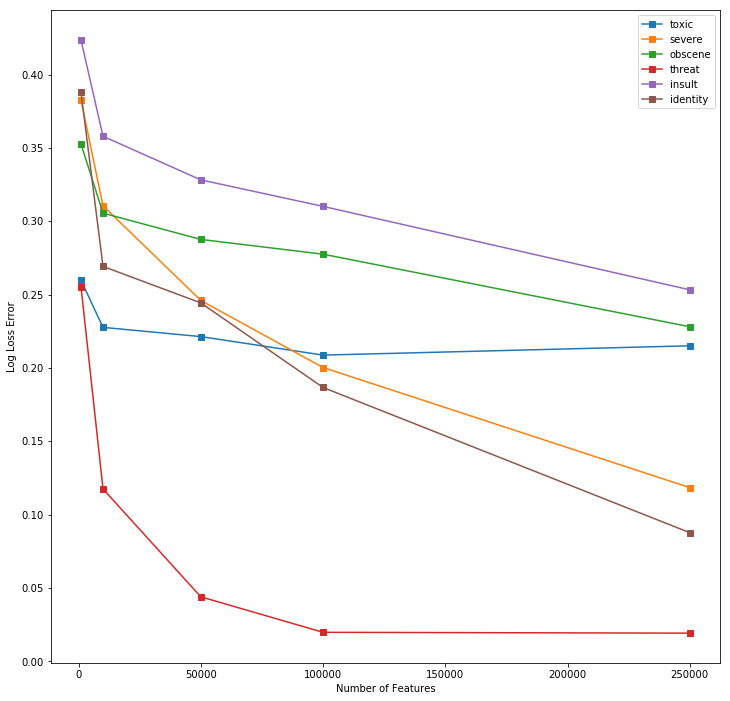

[ 0.34358928  0.2647242   0.22857357  0.20052353  0.15362363]


In [6]:
TfIDF = [[ 0.25973704,  0.38259231,  0.35260526,  0.25524401,  0.42347124,  0.3878858 ],
 [ 0.22764892,  0.31051723,  0.30553084,  0.1174998,   0.35793688,  0.26921151],
 [ 0.22136163,  0.2459898,   0.287604,    0.04395131,  0.32820432,  0.24433037],
 [ 0.20873702,  0.20027658,  0.27754501,  0.01976685,  0.31014506,  0.18667069],
 [ 0.21508665,  0.11841287,  0.22807661,  0.0191923,   0.25326522,  0.08770811]]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import sklearn as sk
import pickle
TfIDF = np.array(TfIDF)
plt.figure(figsize=(12,12))
plt.xlabel('Number of Features')
plt.ylabel('Log Loss Error')
cols = ['toxic','severe','obscene','threat','insult','identity']
for ii in range(6):
    plt.plot([1000,10000,50000,100000,250000],TfIDF[:,ii],'-s',label=cols[ii])
plt.legend()
plt.show()
print(np.mean(TfIDF,axis=1))

In [ ]:
Count  [[ 5.44005352  3.24442325  3.48384799  1.25401956  3.81970083  2.05564242]
 [ 5.36710532  3.11122999  3.34588574  0.41492294  3.54279776  1.15942275]
 [ 4.79755802  1.93839196  2.909193    0.15455915  3.09133384  0.80558492]
 [ 4.24056479  1.2191048   2.57906646  0.11906803  2.69174137  0.52467048]
 [ 3.32067058  0.54886593  1.81057233  0.11293797  1.8988395   0.22814458]]